In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
## Loading the data

df = pd.read_csv("AB_NYC_2019.csv")
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


<AxesSubplot:xlabel='price', ylabel='Count'>

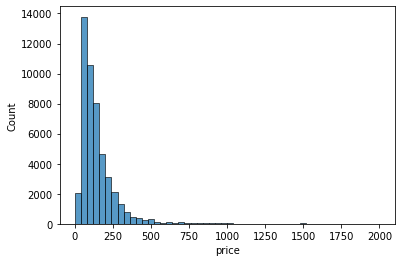

In [3]:
sns.histplot(df[df.price < 2000].price, bins= 50)

### Does it have a long tail?


Yes, it has long tail.

In [4]:
features = ['latitude',
    'longitude',
    'price',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365']

## Find a feature with missing values. How many values does it have?

In [5]:
df[features].isnull().sum()

df.shape[0] - df.reviews_per_month.isnull().sum(), df.reviews_per_month.isnull().sum()


(38843, 10052)

The feature with missing values is reviews_per_month, it has total 38843 values and 10052 missing values.

In [6]:
df[features].describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## What's the median (50% percentile) for variable 'minimum_nights'?

Median for minimum_nights is 3.00000.

In [7]:
np.random.seed(42)
idx = np.arange(df.shape[0])
np.random.shuffle(idx)
n_train = int(0.6 * df.shape[0])
n_val = int(0.2 * df.shape[0])
n_train = int(0.2 * df.shape[0])

df_train = df.iloc[:n_train]
df_val = df.iloc[n_train :n_train + n_val]
df_test = df.iloc[n_train + n_val: ]
X_train = df_train[features]
X_val = df_val[features]
X_test = df_test[features]
y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)


In [8]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [9]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [10]:
X_train_zero = X_train.fillna(0)
X_val_zero = X_val.fillna(0)
X_test_zero = X_test.fillna(0)

w_0, w = train_linear_regression(X_train_zero, y_train)
y_pred = w_0 + X_val_zero.dot(w)
round(rmse(y_pred, y_val), 2)

0.49

In [11]:
X_train_mean = X_train.fillna(X_train.mean())
X_val_mean = X_val.fillna(X_train.mean())
X_test_mean = X_test.fillna(X_train.mean())

w_0, w = train_linear_regression(X_train_mean, y_train)
y_pred = w_0 + X_val_mean.dot(w)
round(rmse(y_pred, y_val), 2)

0.49

## Which option gives the best RMSE?

Both option are giving the same RMSE.

In [12]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [13]:
for x in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train_zero, y_train, x)
    y_pred = w_0 + X_val_zero.dot(w)
    print(x, round(rmse(y_pred, y_val), 2))
    

0 0.49
1e-06 0.49
0.0001 0.49
0.001 0.49
0.01 0.51
0.1 0.52
1 0.52
5 0.52
10 0.52


In [14]:
scores = []
for x in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(x)
    idx = np.arange(df.shape[0])
    np.random.shuffle(idx)
    n_train = int(0.6 * df.shape[0])
    n_val = int(0.2 * df.shape[0])
    n_train = int(0.2 * df.shape[0])

    df_train = df.iloc[:n_train]
    df_val = df.iloc[n_train :n_train + n_val]
    df_test = df.iloc[n_train + n_val: ]
    X_train = df_train[features]
    X_val = df_val[features]
    X_test = df_test[features]
    y_train = np.log1p(df_train.price.values)
    y_val = np.log1p(df_val.price.values)
    y_test = np.log1p(df_test.price.values)
    X_train_zero = X_train.fillna(0)
    X_val_zero = X_val.fillna(0)
    X_test_zero = X_test.fillna(0)

    w_0, w = train_linear_regression(X_train_zero, y_train)
    y_pred = w_0 + X_val.dot(w)
    scores.append(rmse(y_pred, y_val))
round(np.std(scores), 3)

0.0

In [15]:
np.random.seed(9)
idx = np.arange(df.shape[0])
np.random.shuffle(idx)
n_train = int(0.6 * df.shape[0])
n_val = int(0.2 * df.shape[0])
n_train = int(0.2 * df.shape[0])

df_train = df.iloc[:n_train]
df_val = df.iloc[n_train :n_train + n_val]
df_test = df.iloc[n_train + n_val: ]
X_train = df_train[features]
X_val = df_val[features]
X_test = df_test[features]
y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

In [16]:
X_train_full = pd.concat([X_train, X_val])
X_train_full.reset_index(drop=True)
X_train_full = X_train_full.fillna(0)
y_train_full = pd.concat([pd.Series(y_train), pd.Series(y_val)])
w_0, w = train_linear_regression_reg(X_train_full, y_train_full, 0.001)
y_pred = w_0 + X_test.dot(w)
rmse(y_pred, y_test)

0.5011546386475908